In [1]:
import torch
from diffusers import AutoPipelineForText2Image
from PIL import Image
import os

# Load lightweight Stable Diffusion Turbo model
pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sd-turbo",
    torch_dtype=torch.float16
)

# Use CPU if GPU not available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

# Prompts
prompts = [
    "Chest X-ray, AP view, elderly female, clear lung fields, no infiltrates or opacities, normal mediastinum, clinical imaging style ",
    "Chest X-ray, PA view, adult, focal lobar consolidation in right lower lobe, bacterial pneumonia pattern, realistic diagnostic grayscale radiograph",
    "Chest X-ray, PA view, focal opacity in right middle lobe, radiodense lung lesion, grayscale diagnostic imaging",
    "Chest X-ray, PA view, blunting of costophrenic angle, pleural effusion on right side, mediastinal shift, grayscale radiography",
    "Chest X-ray, PA view, cardiomegaly with enlarged cardiac silhouette, normal lung fields, grayscale diagnostic imaging",
    "Chest X-ray, AP view, endotracheal tube and central venous catheter in position, diagnostic grayscale imaging",
    "Chest X-ray, PA view, motion artifact causing blurred ribs and diaphragm edges, clinical imaging artifact",
    "Chest X-ray, AP view, supine position, portable ICU radiograph",
    "Chest X-ray, portable AP imaging, ICU setting, low-resolution clinical radiograph, scanner domain variation",
    "Chest X-ray, PA view, cardiomegaly with enlarged cardiac silhouette, normal lung fields, grayscale diagnostic imaging"
]

# Output directory
output_dir = "Medical_dataset"
os.makedirs(output_dir, exist_ok=True)

# Generate images
for idx, prompt in enumerate(prompts):
    image = pipe(
        prompt=prompt,
        num_inference_steps=4,   # very lightweight
        guidance_scale=0.0
    ).images[0]

    image.save(f"{output_dir}/image_{idx+1}.png")

print("Synthetic dataset generated successfully!")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Synthetic dataset generated successfully!


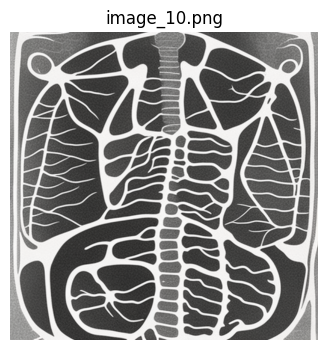

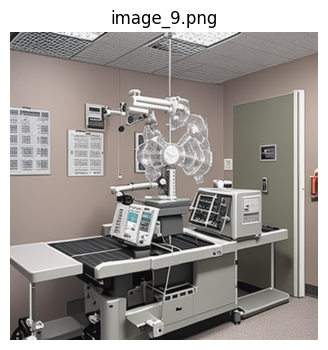

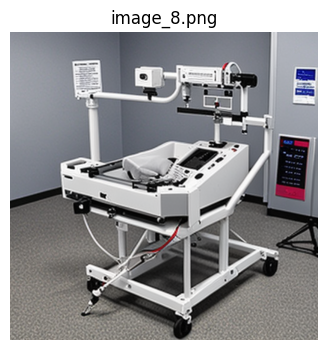

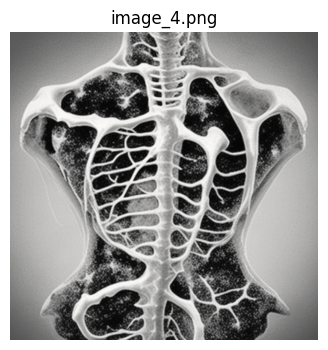

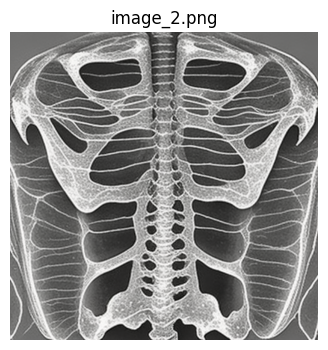

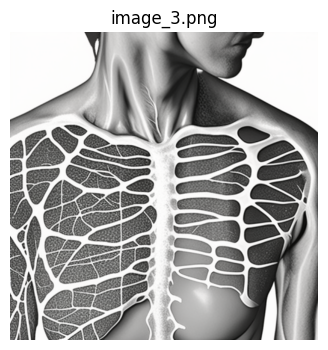

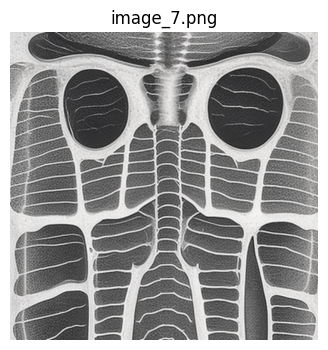

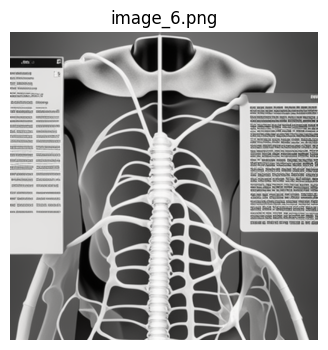

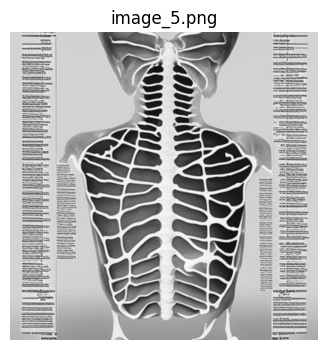

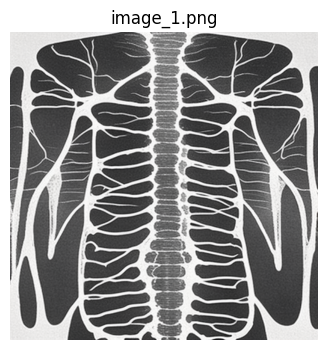

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder = "/content/Medical_dataset/"

for file in os.listdir(folder):
    if file.endswith(".png"):
        img = Image.open(folder + file)
        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(file)
        plt.show()
